# Data Prep

Parte reservada para coletar e filtrar os dados de forma a melhor utilizá-los.

In [1]:
# Primeiro, ignorar todos os avisos
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importar bibliotecas utilizadas neste notebook
import kaggle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Baixar e importar dados com biblioteca da Kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('datahackers/pesquisa-data-hackers-2019', path='./', unzip=True)
df = pd.read_csv("datahackers-survey-2019-anonymous-responses.csv")

In [3]:
# Definir colunas relevantes para serem estudadas. 
# Cheque o arquivo data_dictionary.txt para verificar o significado de cada coluna
cols = ["('P1', 'age')", "('P2', 'gender')", "('P3', 'living_in_brasil')", "('P5', 'living_state')", 
        "('P8', 'degreee_level')", "('P10', 'job_situation')", "('P13', 'manager')", "('P16', 'salary_range')",
        "('P17', 'time_experience_data_science')", "('P18', 'time_experience_before')", 
        "('P19', 'is_data_science_professional')", "('P20', 'linear_regression')", "('P20', 'logistic_regression')",
        "('P20', 'glms')", "('P20', 'decision_tree')", "('P20', 'random_forest')", "('P20', 'neural_networks')",
        "('P20', 'bayesian_inference')", "('P20', 'ensemble')", "('P20', 'svms')", "('P20', 'cnns')", "('P20', 'rnns')",
        "('P20', 'hmms')", "('P20', 'gans')", "('P20', 'markov_chains')", "('P20', 'nlp')", 
        "('P20', 'gradient_boosted_machines')", "('P20', 'cluster_analysis')", "('P20', 'survival_analysis')",
        "('P20', 'longitudinal_data_analysis')", "('P20', 'joint analysis')", "('P20', 'no_listed_methods')",
        "('P21', 'sql_')", "('P21', 'r')", "('P21', 'python')", "('P21', 'c_c++_c#')", "('P21', 'dotnet')",
        "('P21', 'java')", "('P21', 'julia')", "('P21', 'sas_stata')", "('P21', 'visual_basic_vba')", "('P21', 'scala')",
        "('P21', 'matlab')", "('P21', 'php')", "('P21', 'no_listed_languages')",
        "('P22', 'most_used_proggraming_languages')", "('P23', 'sql')", "('P23', 'nosql')", "('P23', 'images')", 
        "('P23', 'nlp')", "('P23', 'videos')", "('P23', 'sheets')", "('P23', 'other')", 
        "('P24', 'sql')", "('P24', 'nosql')", "('P24', 'imagens')", "('P24', 'nlp')", "('P24', 'vídeos')",
        "('P24', 'planilhas')", "('P24', 'other')", "('P25', 'aws')", "('P25', 'gcp')", "('P25', 'azure')", "('P25', 'ibm')",
        "('P25', 'on_premise_servers')", "('P25', 'cloud_própria')", "('P25', 'other')", "('P26', 'mysql')", 
        "('P26', 'oracle')", "('P26', 'sql_server')", "('P26', 'aurora')", "('P26', 'dynamodb')", "('P26', 'coachdb')", 
        "('P26', 'cassandra')", "('P26', 'mongodb')", "('P26', 'mariadb')", "('P26', 'datomic')", "('P26', 's3')",
        "('P26', 'postgresql')", "('P26', 'elaticsearch')", "('P26', 'db2')", "('P26', 'ms_access')", "('P26', 'sqlite')",
        "('P26', 'sybase')", "('P26', 'firebase')", "('P26', 'vertica')", "('P26', 'redis')", "('P26', 'neo4j')",
        "('P26', 'google_bigtable')", "('P26', 'hbase')", "('P26', 'other')", "('P27', 'microsoft_powerbi')",
        "('P27', 'qlik_view_qlik_sense')", "('P27', 'tableau')", "('P27', 'metabase')", "('P27', 'superset')",
        "('P27', 'redash')", "('P27', 'microstrategy')", "('P27', 'ibm_analytics_cognos')", 
        "('P27', 'sap_business_objects')", "('P27', 'oracle_business_intelligence')", "('P27', 'birst')", 
        "('P27', 'looker')", "('P27', 'google_data_studio')", "('P27', 'only_excel_gsheets')", 
        "('P27', 'no_bi_tool_at_work')", "('P27', 'other')", "('P28', 'sql_&_stored_procedures')", 
        "('P28', 'apache_airflow')", "('P28', 'luigi')", "('P28', 'aws_glue')", "('P28', 'talend')",
        "('P28', 'pentaho')", "('P28', 'alteryx')", "('P28', 'oracle_data_integrator')", "('P28', 'ibm_data_stage')",
        "('P28', 'sap_bw_etl')", "('P28', 'siss_sql_server_integration_services')", "('P28', 'other')", 
        "('P29', 'have_data_warehouse')", "('P30', 'google_bigquery')", "('P30', 'aws_redshift')", "('P30', 'snowflake')", 
        "('P30', 'oracle')", "('P30', 'postgres_mysql')", "('P30', 'ibm')", "('P30', 'teradata')", 
        "('P30', 'microsoft_azure')", "('P30', 'do_not_know')", "('P30', 'other')", "('P33', 'telegram_groups')",
        "('P33', 'whatsapp_groups')", "('P33', 'youtube_channels')", "('P33', 'other_brasilian_blogs')", 
        "('P33', 'other_slack_channels')", "('P33', 'twitter')", "('P33', 'abroad_blogs')", "('P33', 'abroad_podcasts')", 
        "('P33', 'meetups_and_events')", "('P33', 'only_data_hackers')", "('P33', 'other')", "('P34', 'udacity')",
        "('P34', 'coursera')", "('P34', 'udemy')", "('P34', 'height')", "('P34', 'edx')", "('P34', 'data_camp')",
        "('P34', 'data_quest')", "('P34', 'kaggle_learn')", "('P34', 'online_courses')", "('P34', 'other')",
        "('P35', 'data_science_plataforms_preference')", "('P35', 'other')", "('D1', 'living_macroregion')",
        "('D3', 'anonymized_degree_area')", "('D4', 'anonymized_market_sector')", "('D5', 'anonymized_manager_level')",
        "('D6', 'anonymized_role')"]

# Redefinir dataframe
df = df[cols]

In [4]:
# Transformar dados categóricos de salários em dados numéricos, considerando a média 
# trazida pelos dados categóricos
df["Sal"] = df["('P16', 'salary_range')"].map({'de R$ 1.001/mês a R$ 2.000/mês': 1500,
                                  'de R$ 2.001/mês a R$ 3000/mês': 2500,
                                  'de R$ 4.001/mês a R$ 6.000/mês': 5000,
                                  'de R$ 6.001/mês a R$ 8.000/mês': 7000,
                                  'de R$ 3.001/mês a R$ 4.000/mês': 3500,
                                  'de R$ 8.001/mês a R$ 12.000/mês': 10000,
                                   'de R$ 12.001/mês a R$ 16.000/mês': 14000,
                                  'Menos de R$ 1.000/mês':1000,
                                   'de R$ 16.001/mês a R$ 20.000/mês': 18000,
                                  'de R$ 20.001/mês a R$ 25.000/mês':22500,
                                  'Acima de R$ 25.001/mês':25000,
                                  np.nan: np.nan,})

# Análise Geral

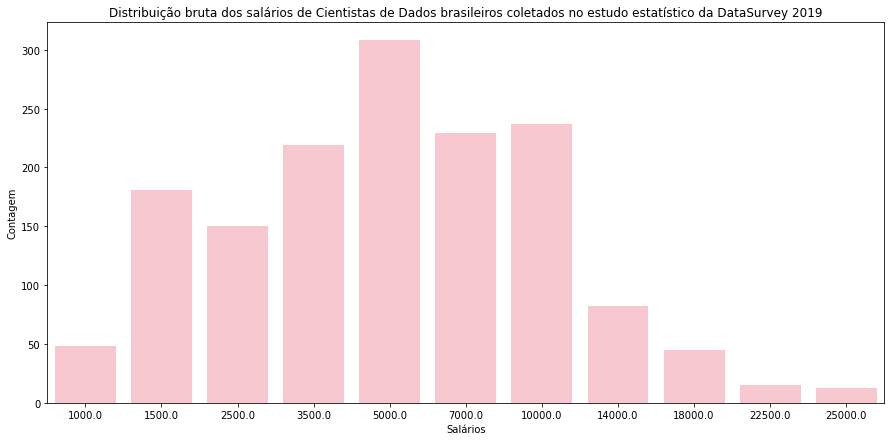

In [5]:
fig = plt.figure(figsize=(15,7))
sns.countplot(df['Sal'], color="pink")
plt.title("Distribuição bruta dos salários de Cientistas de Dados brasileiros coletados no estudo estatístico da DataSurvey 2019")
plt.xlabel("Salários")
plt.ylabel("Contagem")
plt.show()

In [6]:
print("Quantos dados há na pesquisa? \nR: {:.0f}".format(df["Sal"].count()))
print("Qual o salário médio de quem respondeu? \nR: R${:.2f}".format(np.mean(df["Sal"])))
print("Qual o salário mediano ? \nR: R${:.2f}".format(np.median(df["Sal"].dropna())))
print("Qual o desvio padrão da medida? \nR: R${:.2f}".format(np.std(df["Sal"])))

Quantos dados há na pesquisa? 
R: 1527
Qual o salário médio de quem respondeu? 
R: R$6283.24
Qual o salário mediano ? 
R: R$5000.00
Qual o desvio padrão da medida? 
R: R$4633.44


# Análise do meu perfil

### Análise do perfil de experiência profissional

In [7]:
# Filtro de características do meu perfil
df_perfil = df[
    (df["('P3', 'living_in_brasil')"]==1) &
    (df["('P8', 'degreee_level')"]=="Graduação/Bacharelado") &
    (df["('P10', 'job_situation')"]=="Empregado (CTL)") &
    (df["('P13', 'manager')"]==0) &
    (df["('P17', 'time_experience_data_science')"]=="de 1 a 2 anos") &
    (df["('P19', 'is_data_science_professional')"]==1)
]

In [8]:
print("Qual o salário médio de alguém no meu perfil? \nR: R${:.2f}".format(np.average(df_perfil["Sal"])))
print("Qual o salário mediano de alguém no meu perfil? \nR: R${:.2f}".format(np.median(df_perfil["Sal"])))
print("Qual o desvio padrão da medida? \nR: R${:.2f}".format(np.std(df_perfil["Sal"])))

Qual o salário médio de alguém no meu perfil? 
R: R$4680.00
Qual o salário mediano de alguém no meu perfil? 
R: R$5000.00
Qual o desvio padrão da medida? 
R: R$2118.40


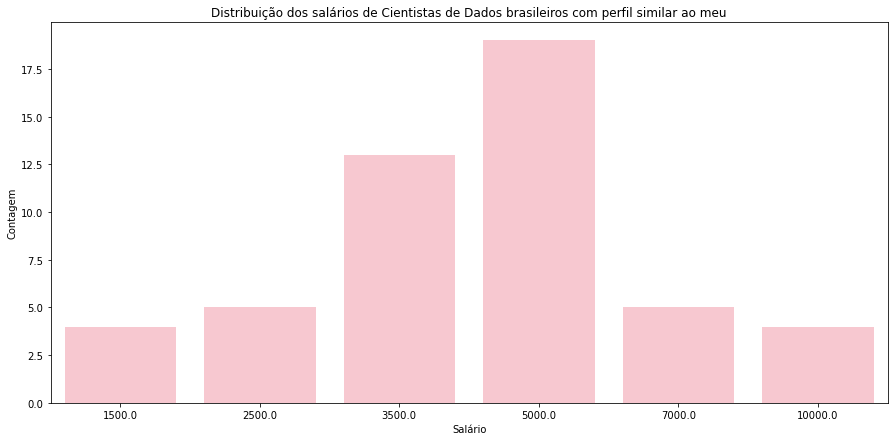

In [9]:
fig = plt.figure(figsize=(15,7))
sns.countplot(df_perfil['Sal'], color="pink")
plt.title("Distribuição dos salários de Cientistas de Dados brasileiros com perfil similar ao meu")
plt.xlabel("Salário")
plt.ylabel("Contagem")
plt.show()

### Avaliação do mesmo perfil de experiência profissional, porém não formado

Qual o salário médio de alguém no meu perfil sem formação? 
R: R$3586.96
Qual o salário mediano de alguém no meu perfil sem formação? 
R: R$3500.00
Qual o desvio padrão da medida? 
R: R$1479.22


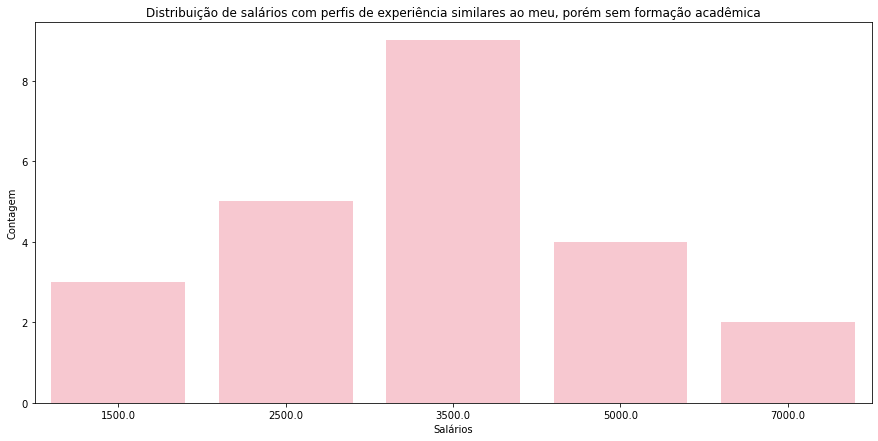

In [10]:
df_perfil_sem_form = df[
    (df["('P3', 'living_in_brasil')"]==1) &
    ((df["('P8', 'degreee_level')"]=="Estudante de Graduação") | (df["('P8', 'degreee_level')"]=="Não tenho graduação formal")) &
    (df["('P10', 'job_situation')"]=="Empregado (CTL)") &
    (df["('P13', 'manager')"]==0) &
    (df["('P17', 'time_experience_data_science')"]=="de 1 a 2 anos") &
    (df["('P19', 'is_data_science_professional')"]==1)
]

print("Qual o salário médio de alguém no meu perfil sem formação? \nR: R${:.2f}".format(np.average(df_perfil_sem_form["Sal"])))
print("Qual o salário mediano de alguém no meu perfil sem formação? \nR: R${:.2f}".format(np.median(df_perfil_sem_form["Sal"])))
print("Qual o desvio padrão da medida? \nR: R${:.2f}".format(np.std(df_perfil_sem_form["Sal"])))

fig = plt.figure(figsize=(15,7))
sns.countplot(df_perfil_sem_form['Sal'], color="pink")
plt.title("Distribuição de salários com perfis de experiência similares ao meu, porém sem formação acadêmica")
plt.xlabel("Salários")
plt.ylabel("Contagem")
plt.show()

### Avaliação do perfil de conhecimento técnico

Qual o salário médio de alguém no meu perfil técnico? 
R: R$5125.00
Qual o salário mediano de alguém no meu perfil técnico? 
R: R$4250.00
Qual o desvio padrão da medida? 
R: R$2175.86


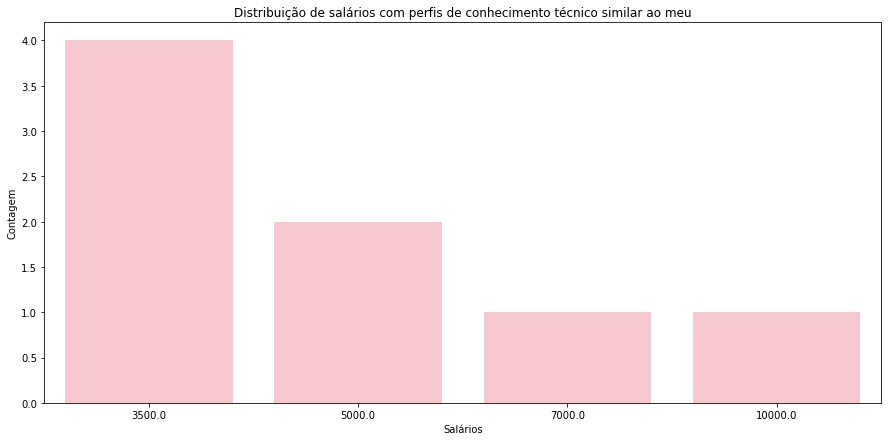

In [11]:
df_tech = df[
    (df["('P17', 'time_experience_data_science')"]=="de 1 a 2 anos") &
    (df["('P19', 'is_data_science_professional')"]==1) &
    (df["('P20', 'linear_regression')"]==1) &
    (df["('P20', 'logistic_regression')"]==1) &
    (df["('P20', 'decision_tree')"]==1) &
    (df["('P20', 'ensemble')"]==1) &
    (df["('P20', 'svms')"]==1) &
    (df["('P20', 'cnns')"]==1) &
    (df["('P20', 'cluster_analysis')"]==1) 
]

print("Qual o salário médio de alguém no meu perfil técnico? \nR: R${:.2f}".format(np.average(df_tech["Sal"])))
print("Qual o salário mediano de alguém no meu perfil técnico? \nR: R${:.2f}".format(np.median(df_tech["Sal"])))
print("Qual o desvio padrão da medida? \nR: R${:.2f}".format(np.std(df_tech["Sal"])))

fig = plt.figure(figsize=(15,7))
sns.countplot(df_tech['Sal'], color="pink")
plt.title("Distribuição de salários com perfis de conhecimento técnico similar ao meu")
plt.xlabel("Salários")
plt.ylabel("Contagem")
plt.show()

### Avaliação do perfil de uso de linguagens

Qual o salário médio de alguém no meu perfil técnico? 
R: R$6954.02
Qual o salário mediano de alguém no meu perfil técnico? 
R: R$5000.00
Qual o desvio padrão da medida? 
R: R$4873.40


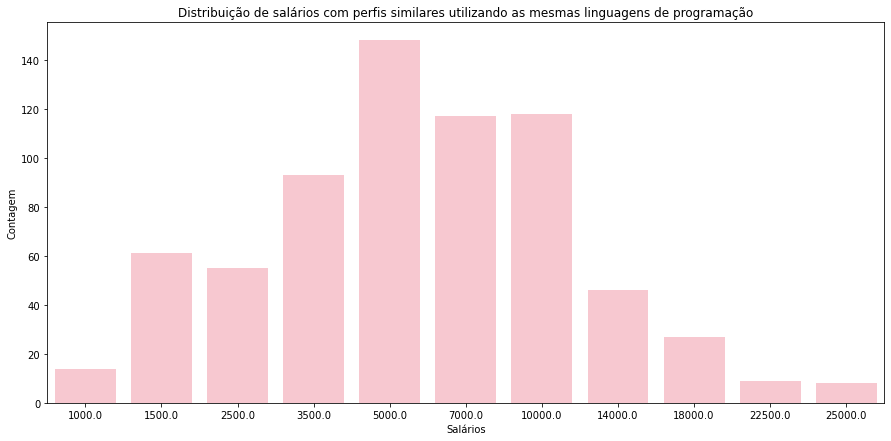

In [12]:
df_lang = df[
    (df["('P17', 'time_experience_data_science')"]=="de 1 a 2 anos") &
    (df["('P19', 'is_data_science_professional')"]==1) &
    (df["('P21', 'sql_')"]==1) |
    (df["('P21', 'python')"]==1) |
    (df["('P21', 'scala')"]==1)
]

print("Qual o salário médio de alguém no meu perfil técnico? \nR: R${:.2f}".format(np.mean(df_lang["Sal"])))
print("Qual o salário mediano de alguém no meu perfil técnico? \nR: R${:.2f}".format(np.median(df_lang["Sal"].dropna())))
print("Qual o desvio padrão da medida? \nR: R${:.2f}".format(np.std(df_lang["Sal"])))


fig = plt.figure(figsize=(15,7))
sns.countplot(df_lang['Sal'], color="pink")
plt.title("Distribuição de salários com perfis similares utilizando as mesmas linguagens de programação")
plt.xlabel("Salários")
plt.ylabel("Contagem")
plt.show()